<a href="https://colab.research.google.com/github/kareem1925/Ismailia-school-of-AI/blob/master/machine%20learning%20for%20classifying%20quantum%20states/pennylane-quantum-state-learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pennylane --upgrade

     |████████████████████████████████| 204kB 2.9MB/s 
  Found existing installation: semantic-version 2.8.4
    Uninstalling semantic-version-2.8.4:
      Successfully uninstalled semantic-version-2.8.4


In [0]:
import os
os.kill(os.getpid(), 9)

In [0]:
import pennylane as qml
from pennylane import numpy as np

In [0]:
dev1 = qml.device('default.qubit',wires=2,analytic=False,shots=1000)

@qml.qnode(dev1)
def circuit(params):
    qml.RY(params[0],wires=0)
    qml.CNOT(wires=[0,1])
    return qml.expval(qml.Hermitian(H,wires=[0,1]))

In [3]:
y = np.array([1/np.sqrt(2),0,0,1/np.sqrt(2)])
H = np.outer(y,y)
print(circuit([np.pi/2]))
dev1.state

0.9999999999999999


array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

In [0]:
def cross_entropy(predictions, targets, epsilon=1e-20):
    """
    Computes cross entropy between targets (encoded as one-hot vectors)
    and predictions. 
    Input: predictions (N, k) ndarray
           targets (N, k) ndarray        
    Returns: scalar
    """
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -np.sum(targets*np.log10(predictions+epsilon))/N
    return ce

In [0]:
la = np.array([0.5,0,0,0.5])
def cost(var):
#    return cross_entropy(circuit(var),la) if i'm going to use probs value form qnode
    return abs(1 - circuit(var))

In [6]:
np.random.seed(6)
init_params = np.random.rand(1)
print(init_params)
print(cost(init_params))

[0.89286015]
0.10100000000000009


In [0]:
opt = qml.GradientDescentOptimizer(stepsize=0.1)

# set the number of steps
steps = 1000
# set the initial parameter values
params = init_params
los = np.inf

cost1000 = []
for i in range(steps):
    # update the circuit parameters
    params = opt.step(cost, params)
    t = cost(params)
    cost1000.append(t)

    if (i + 1) % 1 == 0:
        print("Cost after step {:5d}: {: .30f}".format(i + 1, t))

print("Optimized rotation angles: {}".format(params))
final_1000 = params 

In [0]:
opt = qml.GradientDescentOptimizer(stepsize=0.1)

# set the number of steps
steps = 1000
# set the initial parameter values
params = init_params
dev1.shots = 100

cost100 = []
for i in range(steps):
    # update the circuit parameters
    params = opt.step(cost, params)
    t = cost(params)
    cost100.append(t)

    if (i + 1) % 1 == 0:
        print("Cost after step {:5d}: {: .30f}".format(i + 1, t))

print("Optimized rotation angles: {}".format(params))
final_100 = params

In [0]:
opt = qml.GradientDescentOptimizer(stepsize=0.1)

# set the number of steps
steps = 1000
# set the initial parameter values
params = init_params
dev1.shots = 10

cost10 = []
for i in range(steps):
    # update the circuit parameters
    params = opt.step(cost, params)
    t = cost(params)
    cost10.append(t)

    if (i + 1) % 1 == 0:
        print("Cost after step {:5d}: {: .30f}".format(i + 1, t))

print("Optimized rotation angles: {}".format(params))
final_10 = params

In [0]:
opt = qml.GradientDescentOptimizer(stepsize=0.1)

# set the number of steps
steps = 1000
# set the initial parameter values
params1 = init_params
dev1.shots = 1

cost1 = []
for i in range(steps):
    # update the circuit parameters
    params1 = opt.step(cost, params1)
    t = cost(params1)
    cost1.append(t)

    if (i + 1) % 1 == 0:
        print("Cost after step {:5d}: {: .30f}".format(i + 1, t))

print("Optimized rotation angles: {}".format(params1))
final_1 = params

In [0]:
opt = qml.GradientDescentOptimizer(stepsize=0.1)

# set the number of steps
steps = 1000
# set the initial parameter values
params = init_params
dev1.analytic = True

cost_analytic = []
for i in range(steps):
    # update the circuit parameters
    params = opt.step(cost, params)
    t = cost(params)
    cost_analytic.append(t)

    if (i + 1) % 1 == 0:
        print("Cost after step {:5d}: {: .30f}".format(i + 1, t))

print("Optimized rotation angles: {}".format(params))
final = params

In [0]:
from matplotlib import pyplot as plt
plt.style.use("fast")

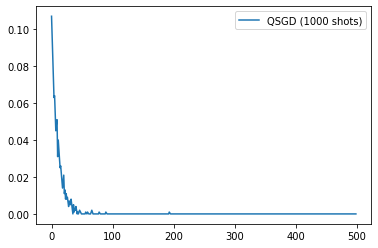

In [15]:
plt.plot(cost1000[:500] ,label="QSGD (1000 shots)")
plt.legend()

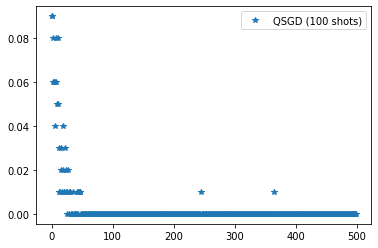

In [16]:
plt.plot(cost100[:500], "*", label="QSGD (100 shots)")
plt.legend()

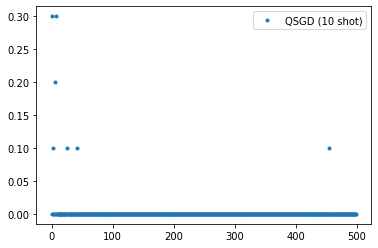

In [17]:
plt.plot(cost10[:500],".", label="QSGD (10 shot)")
plt.legend()

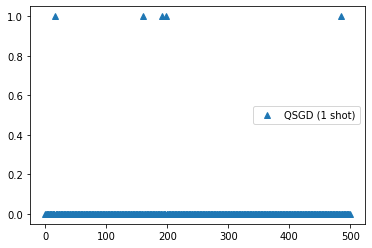

In [18]:
plt.plot(cost1[:500],"^", label="QSGD (1 shot)")
plt.legend()

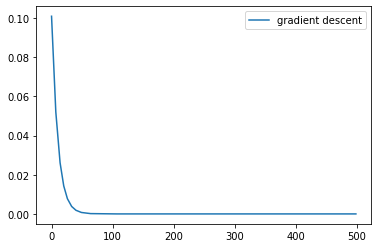

In [21]:
plt.plot(cost_analytic[:500],"-", label="gradient descent")
plt.legend()

In [29]:
print(cost1000[np.argmin(cost1000)],cost100[np.argmin(cost100)],cost10[np.argmin(cost10)],cost1[np.argmin(cost1)],cost_analytic[np.argmin(cost_analytic)])

1.1102230246251565e-16 1.1102230246251565e-16 2.220446049250313e-16 2.220446049250313e-16 2.220446049250313e-16


In [23]:
abs(np.dot(dev1.state.conj().T,y))**2

1.0

In [24]:
dev1.state

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

In [25]:
final,final_1000,final_100,final_10,final_1

(array([1.57079633]),
 array([1.56786015]),
 array([1.57436015]),
 array([1.57286015]),
 array([1.57286015]))